In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()

In [6]:
sc = spark.sparkContext

In [7]:
data = spark.read.csv('Indaiatuba_BigData_Prep.csv', inferSchema=True, header=True)

In [8]:
data.printSchema()

root
 |-- CURSO: string (nullable = true)
 |-- TURNO: string (nullable = true)
 |-- NOME: string (nullable = true)
 |-- STATUS_ALUNO: integer (nullable = true)
 |-- ESCOLA_PUBLICA: integer (nullable = true)
 |-- RAÇA: double (nullable = true)
 |-- NOTA_VESTIBULAR: double (nullable = true)
 |-- MediaNotas: double (nullable = true)
 |-- Frequencia: double (nullable = true)



In [9]:
#data.show()

In [10]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [11]:
#Cria uma caixa preparada para receber os dados e devolver uma coluna com sua junção
featureAssembler=VectorAssembler(inputCols=['ESCOLA_PUBLICA','RAÇA','NOTA_VESTIBULAR','MediaNotas','Frequencia'],outputCol='Idependent_Features')

In [12]:
#Recebe os dados -data- e adicina a coluna conforme estipulado pela caixa
output=featureAssembler.transform(data)

In [1]:
#Apenas os dados relevantes (entradas, saida)
finalized_data = output.select('Idependent_Features','STATUS_ALUNO')

NameError: name 'output' is not defined

In [14]:
from pyspark.ml.regression import LinearRegression
#Cria a caixa da regreção que recebera dados
regressor = LinearRegression(featuresCol='Idependent_Features', labelCol='STATUS_ALUNO')

In [15]:
train_data,test_data = finalized_data.randomSplit([.75,.25])

In [16]:
#Coloca os dados -train_data- na caixa
regressor=regressor.fit(train_data)

In [17]:
regressor.coefficients

DenseVector([0.0041, 0.0086, 0.0009, 0.1173, -0.0009])

In [18]:
regressor.

SyntaxError: invalid syntax (<ipython-input-18-27572b1b3251>, line 1)

In [19]:
regressor.intercept

-0.12467721972874138

In [20]:
pred_results=regressor.evaluate(test_data)

In [21]:
pred_results.predictions.show()

+--------------------+------------+--------------------+
| Idependent_Features|STATUS_ALUNO|          prediction|
+--------------------+------------+--------------------+
|(5,[0,1],[1.0,-0....|           0|  -0.126999974631805|
|(5,[0,1],[1.0,-0....|           0|  -0.126999974631805|
|(5,[0,2],[1.0,48....|           0|-0.07961715850164203|
|(5,[0,2],[1.0,56....|           0| -0.0720192135497004|
|(5,[0,2],[1.0,58....|           0|-0.07037860288985881|
|(5,[0,2],[1.0,60.5])|           0|-0.06897236518142316|
|(5,[0,4],[1.0,57.5])|           0|-0.17179056546588173|
|     (5,[1],[-0.75])|           0|-0.13114277986981648|
|     (5,[1],[-0.75])|           0|-0.13114277986981648|
|     (5,[1],[-0.75])|           0|-0.13114277986981648|
|     (5,[1],[-0.75])|           0|-0.13114277986981648|
|       (5,[1],[0.5])|           0|-0.12036684630135798|
|(5,[1,2],[-0.75,5...|           0|-0.08664686197907936|
|(5,[1,2],[-0.75,5...|           0|-0.08226707071626072|
|(5,[1,2],[-0.75,5...|         

In [22]:
type(pred_results)

pyspark.ml.regression.LinearRegressionSummary

In [23]:
print(pred_results.meanAbsoluteError,',',pred_results.meanSquaredError)

0.26922217439633794 , 0.109731568939899


In [24]:
pred_results.rootMeanSquaredError

0.3312575568042169

In [25]:
pred_results.r2

0.4946492269895777

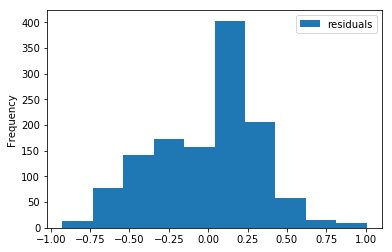

In [37]:
pred_results.residuals.toPandas().plot.hist()

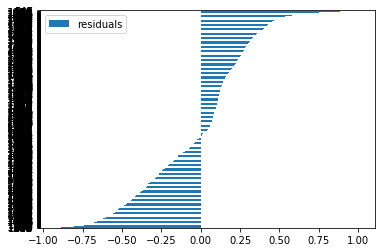

In [49]:
a=pred_results.residuals.toPandas().sort_values('residuals').plot.barh()

In [50]:
pred_results.predictions.filter('STATUS_ALUNO=1').show()

+--------------------+------------+--------------------+
| Idependent_Features|STATUS_ALUNO|          prediction|
+--------------------+------------+--------------------+
|(5,[3,4],[8.59166...|           1|  0.8040502570511628|
|[0.0,-1.0,44.55,7...|           1|  0.7111247594662474|
|[0.0,-1.0,48.0,5....|           1| 0.48701302805006863|
|[0.0,-1.0,51.911,...|           1|  0.7021804703305049|
|[0.0,-1.0,62.438,...|           1|  0.5145997510718847|
|[0.0,-1.0,64.0,7....|           1|  0.7465233356180578|
|[0.0,-0.75,0.0,1....|           1|0.061590505027402626|
|[0.0,-0.75,0.0,5....|           1|  0.4480282360021556|
|[0.0,-0.75,22.727...|           1|  0.5788468288736879|
|[0.0,-0.75,25.3,6...|           1|  0.6202070404649965|
|[0.0,-0.75,28.788...|           1|  0.5098371495297198|
|[0.0,-0.75,29.2,6...|           1|   0.582913258584622|
|[0.0,-0.75,32.0,8...|           1|  0.7611385270864037|
|[0.0,-0.75,33.0,7...|           1|  0.6442810682247921|
|[0.0,-0.75,36.05,...|         